<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [31]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [32]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


# **Task 2: Descriptive Statistics and Visualizations**

# 1. Boxplot for MEDV

Text(0.5, 1.0, 'Boxplot for MEDV')

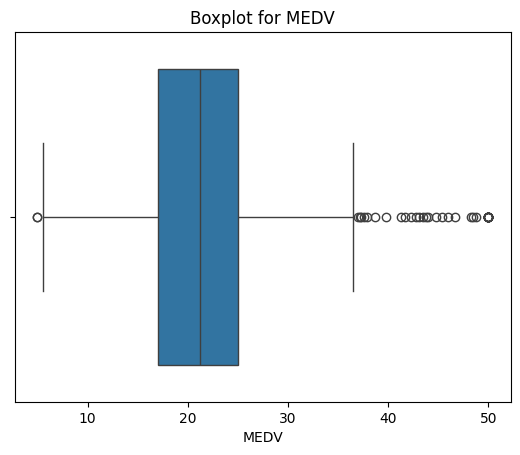

In [33]:
sns.boxplot(x=boston_df.MEDV)
pyplot.title("Boxplot for MEDV")

As seen in the box plot above, the median home value is around 21,000. Most data points lie between roughly 17,000 and 25,000. This indicates that the majority of homes have similar median values. However, there are several outliers above 35,000, suggesting the presence of a few homes with unusually high median values compared to the rest of the dataset.

# 2. Bar plot for CHAS

Text(0.5, 1.0, 'Bar plot for CHAS')

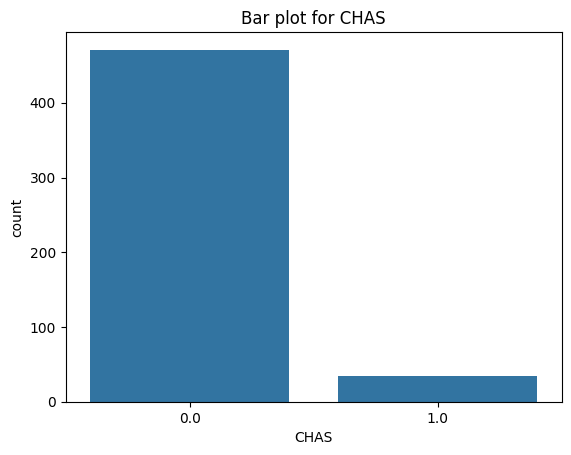

In [34]:
sns.countplot(x=boston_df.CHAS)
pyplot.title("Bar plot for CHAS")

The bar plot above indicates that most tracts do not bound the Charles River.

# 3. Boxplot for the MEDV variable vs the AGE variable

Text(0.5, 1.0, 'MEDV Distribution by Age Group')

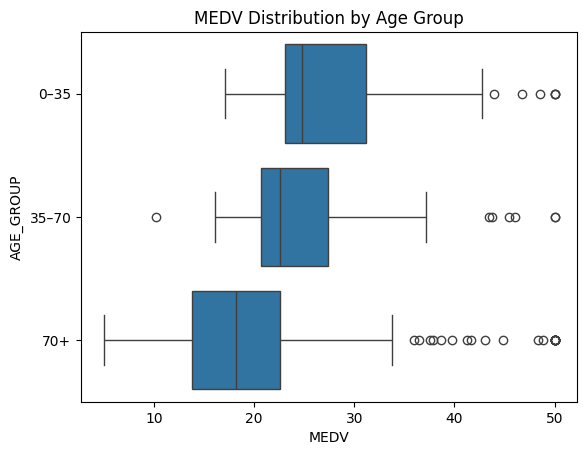

In [35]:
bins = [0, 35, 70, float('inf')]
labels = ['0–35', '35–70', '70+']

boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)
sns.boxplot(x='MEDV', y='AGE_GROUP', data=boston_df)
pyplot.title('MEDV Distribution by Age Group')

The boxplot above shows that median home values tend to decrease as the age of the houses increases. Homes in the 0–35 age group generally have higher median values, while those in the 70+ age group have lower median values. Additionally, while all age groups display several high-value outliers, it seems as though older houses have greater amount of outliers.

# 4. Scatter plot between NOX and INDUS

Text(0.5, 1.0, 'Scatter plot between NOX and INDUS')

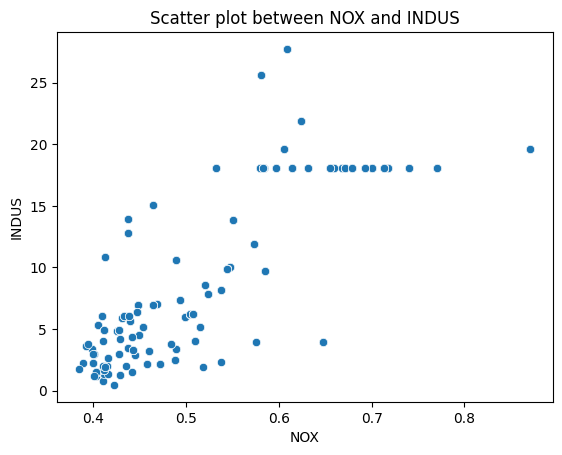

In [36]:
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.title("Scatter plot between NOX and INDUS")

The scatter plot above reveals a generally positive correlation between NOX concentration and non-retail business acres across towns. This means that as NOX levels increase, INDUS values tend to rise. Notably, there is a dense horizontal clustering of data points around an INDUS value of approximately 18, indicating that many towns share similar non-retail business acre proportions despite varying NOX levels.

#5. Histogram for PTRATIO

Text(0.5, 1.0, 'Histogram for the Pupil to Teacher Ratio')

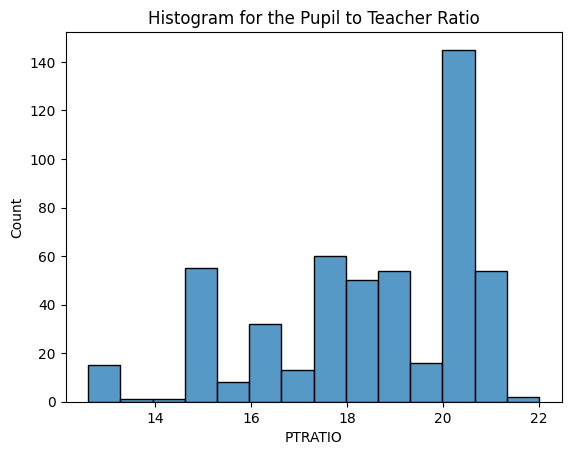

In [37]:
sns.histplot(boston_df['PTRATIO'])
pyplot.title("Histogram for the Pupil to Teacher Ratio")

The histogram above illustrates the distribution of pupil-to-teacher ratios. The most frequent PTRATIO is around 20, appearing in over 140 instances, indicating that many towns operate with relatively high student loads per teacher. In general, it seems as though there is a good amount of variation in classroom density between towns. Very low and very high ratios are rare, implying that extreme cases of overcrowding or underutilization are uncommon.


# **Task 3: Use the appropriate tests to answer the questions provided**

# 1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Null Hypothesis (H₀): There is no significant difference in the mean house values between the two groups.

Alternative Hypothesis (H₁): There is a significant difference in the mean house values between the two groups.


In [38]:
boston_df_chas0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
boston_df_chas1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

t_stat, p_value = scipy.stats.ttest_ind(boston_df_chas0, boston_df_chas1)
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -3.996437466090509
P-value: 7.390623170519905e-05


Reject the null hypothesis.

There is a statistically significant difference in the mean house values between homes bounded by the Charles River and those that are not


# 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Null Hypothesis (H₀):
There is no relationship between AGE and MEDV

Alternative Hypothesis (H₁):
There is a relationship between AGE and MEDV



In [39]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_group'] = 0
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_group'] = 1
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_group'] = 2
ag0=boston_df[boston_df['AGE_group'] == 0]['MEDV']
ag1=boston_df[boston_df['AGE_group'] == 1]['MEDV']
ag2=boston_df[boston_df['AGE_group'] == 2]['MEDV']

stat, p = scipy.stats.levene(boston_df[boston_df['AGE_group'] == 0]['MEDV'],
                               boston_df[boston_df['AGE_group'] == 1]['MEDV'],
                               boston_df[boston_df['AGE_group'] == 2]['MEDV'], center='mean')

f_stat, p_value = scipy.stats.f_oneway(ag0, ag1, ag2)
print("F-statistic:", f_stat)
print("P-value:", p_value)

F-statistic: 36.40764999196598
P-value: 1.7105011022702984e-15


Reject the null hypothesis (H₀)

There is a statistically significant difference in median house values across different proportions of older housing stock (AGE)


# 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Null Hypothesis (H₀):
There is no linear correlation between NOX and INDUS

Alternative Hypothesis (H₁):
There is a linear correlation between NOX and INDUS


In [40]:
stat, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("Statistic:", stat)
print("P-value:", p_value)

Statistic: 0.7636514469209154
P-value: 7.913361061239639e-98


Reject the null hypothesis (H₀)

There is a statistically significant linear relationship between NOX and INDUS


# 4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Null Hypothesis (H₀):
There is no linear relationship between distance to employment centers and median home value

Alternative Hypothesis (H₁):
There is a linear relationship between distance to employment centers and median home value


In [41]:
X = boston_df['DIS']
Y = boston_df['MEDV']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           1.21e-08
Time:                        04:22:03   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

Reject the null hypothesis (H₀)

There is a statistically significant positive relationship between distance to employment centers and median home value.
